In [49]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
yf.pdr_override()

In [57]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433824,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500647,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751300,394024400


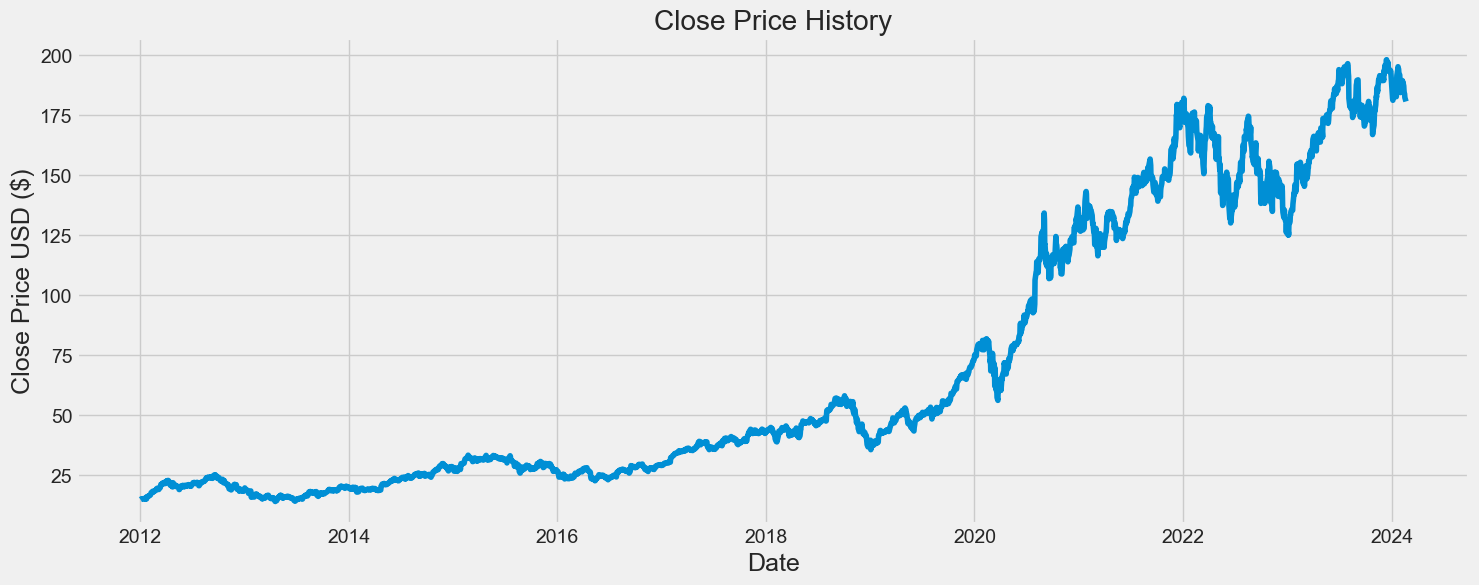

In [63]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [58]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2900

In [60]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.92262268],
       [0.91420619],
       [0.90538793]])

In [61]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])   
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2840, 60, 1)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2840/2840 [==============================] - 47s 16ms/step - loss: 0.0012


In [56]:

test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 14ms/step


7.712038461807421

C:\Users\bhargav\AppData\Local\Temp\ipykernel_16016\2388977846.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



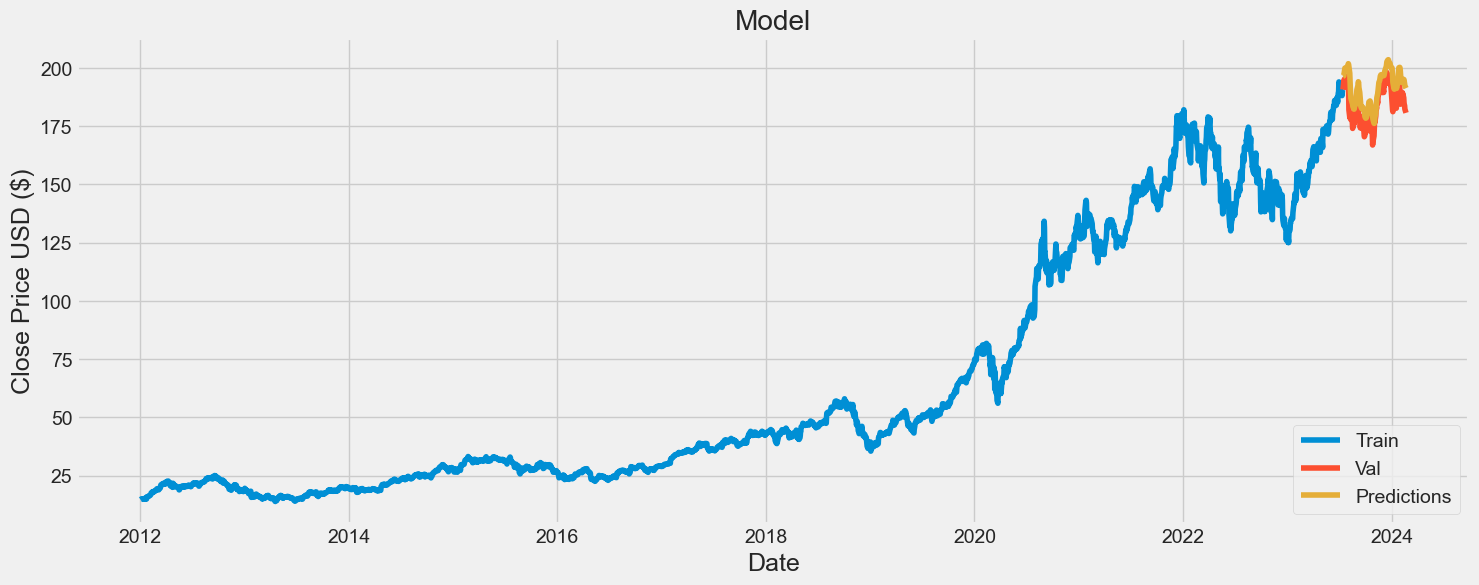

In [62]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

60.15666455904169

In [45]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Create traces
trace1 = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace2 = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Val')
trace3 = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Add traces to subplots
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)

# Update layout
fig.update_layout(title='Model',
                  xaxis_title='Date',
                  yaxis_title='Close Price USD ($)',
                  legend=dict(x=0, y=1),
                  showlegend=True)

# Show plot
fig.show()


C:\Users\bhargav\AppData\Local\Temp\ipykernel_16016\2269802562.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
model.save('lstm_model.h5')

In [64]:
def get_the_data():
    df = pdr.get_data_yahoo("amzn", start='2023-01-01', end=datetime.now())
    return df
get_the_data()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400
2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100
...,...,...,...,...,...,...
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200
